## **Real Estate Price Prediction - Phase 2**



In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

**Dataset - 1 (Real estate.csv)**

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

Y=House Price of unit area

In [100]:
data1=pd.read_csv('Real estate.csv')
df1=pd.DataFrame(data1)

Data Preprocessing

In [101]:
df1.shape

(414, 8)

In [102]:
df1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [103]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Dropping unwanted columns and empty columns (Not required for predicting real estate price) 

In [104]:
df1.dropna(inplace=True)  #drop null value columns
df1.drop(['No', 'X1 transaction date'], axis = 1, inplace = True) #drop unwanted values 

Viewing data after preprocessing

In [105]:
df1.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


Normalizing data

In [107]:
x_train=df1.drop('Y house price of unit area', axis = 1)
y_train = df1['Y house price of unit area']
scaler=MinMaxScaler()
x_norm=scaler.fit_transform(x_train)  

Standardising data

In [108]:
from sklearn.preprocessing import StandardScaler
x_train1=df1.drop('Y house price of unit area', axis = 1)
y_train1 = df1['Y house price of unit area']
scaler1=StandardScaler()
x_std=scaler1.fit_transform(x_train1)

In [109]:
df1.head()  #data before normalization/standardisation

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [110]:
x_norm  #data after normalization

array([[0.73059361, 0.00951267, 1.        , 0.61694135, 0.71932284],
       [0.44520548, 0.04380939, 0.9       , 0.5849491 , 0.71145137],
       [0.30365297, 0.08331505, 0.5       , 0.67123122, 0.75889584],
       ...,
       [0.42922374, 0.05686115, 0.7       , 0.57149782, 0.71522536],
       [0.18493151, 0.0125958 , 0.5       , 0.42014057, 0.72395946],
       [0.14840183, 0.0103754 , 0.9       , 0.51211827, 0.75016174]])

In [111]:
x_std #data after standardisation

array([[ 1.25562833, -0.79249504,  2.00740743,  1.12542986,  0.44876222],
       [ 0.15708622, -0.61661163,  1.66750286,  0.91244418,  0.40113894],
       [-0.38779067, -0.41401527,  0.30788458,  1.48686011,  0.68818339],
       ...,
       [ 0.09556786, -0.54967846,  0.98769372,  0.82289338,  0.42397202],
       [-0.84478419, -0.77668389,  0.30788458, -0.18475479,  0.4768143 ],
       [-0.98539758, -0.78807071,  1.66750286,  0.42757905,  0.63534112]])

Data Summarization

In [112]:
df1.describe() #elaborates type of data and attributes

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [113]:
df1['X3 distance to the nearest MRT station'].unique()    #o/p all unique values in a given column

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

Data Visualization

Correlation Heatmap

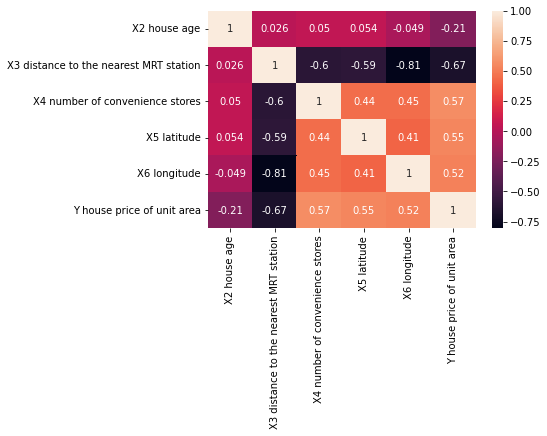

In [114]:
sns.heatmap(df1.corr(),annot=True)

Pairplots

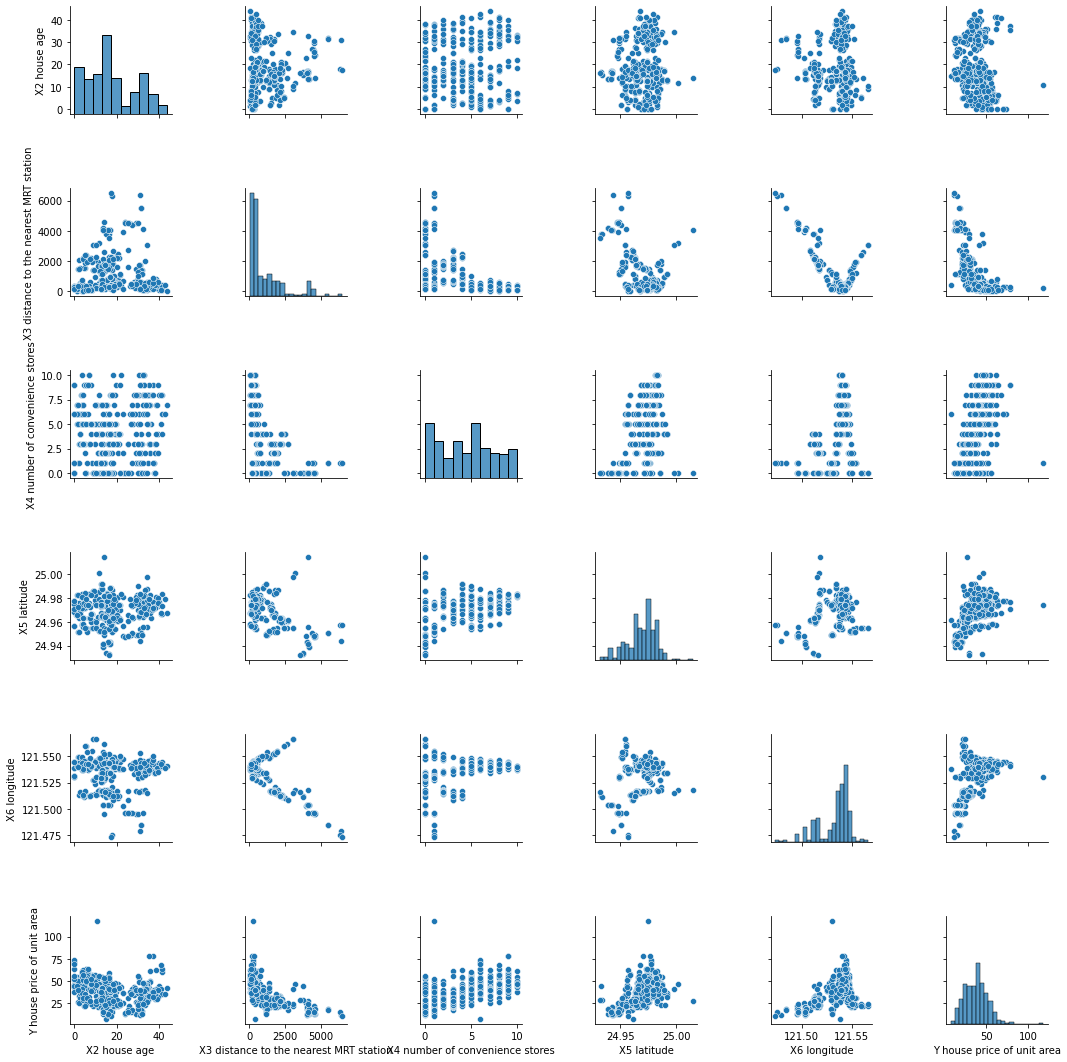

In [115]:
sns.pairplot(df1)

Histogram plot

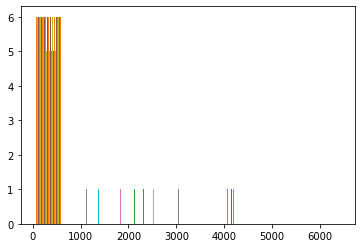

In [116]:
plt.hist(df1)
plt.show()

* Dataset used was 'Real estate.csv'
* The dataset was taken from kaggle (https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)
* Many python libraries were used for cleaning, preprocessing and visualising the dataset.
* Some of these libraries were pandas, sklearn, seaborn and matplotlib.
* MinMaxScaler which is a normalizing tool in python's sklearn library was used to normalize the data.
* StandardScaler which is a standardization tool in python's sklearn library was used to standardize the data
* Unwanted features and null parameters were avoided and the data was made ready for prediction.
* Pairplots, correlation heatmaps and histograms were also used to visually represent the dataset in a better way.

In [117]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV

In [118]:
X=df1.drop('Y house price of unit area', axis=1)
y=df1['Y house price of unit area']

In [119]:
X.shape

(414, 5)

In [120]:
y.shape

(414,)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

Using Linear Regression

In [123]:
lin_model=LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [124]:
y_predicted = lin_model.predict(X_test)

In [125]:
lin_mae = mean_absolute_error(y_test, y_predicted)
print(lin_mae)

lin_rmse = np.sqrt(mean_squared_error(y_test,y_predicted))          
print(lin_rmse)

lin_r2 = r2_score(y_test,y_predicted)
print(lin_r2 )

5.420437972249706
6.9118926128561515
0.6591473968309041


Using LASSO regression

In [126]:
lasso_model = LassoCV(eps=0.01,n_alphas=1000,max_iter=1000)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

In [127]:
lasso_model.alpha_

124.09942892459246

In [128]:
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print(lasso_mae)

lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_y_pred))          
print(lasso_rmse)

lasso_r2 = r2_score(y_test,lasso_y_pred)
print(lasso_r2 )

6.059345601924672
8.28901289454958
0.5097943850508748


As we can observe, the MSE while using a linear regression model is less when compared to a lasso regression model. The values of RMSE also shares the same property. So Linear regression was chosen as a better model for the problem.

Plotting the predictions of the model which was done by Linear Regression.

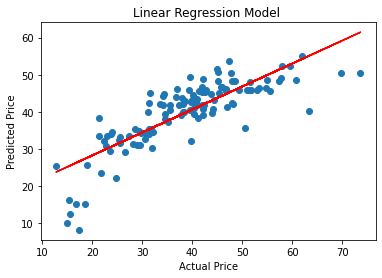

In [129]:
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model ')
z = np.polyfit(y_test, y_predicted, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

In [130]:
accuracy=lin_model.score(X_test,y_test)
print('Accuracy of the model: ',accuracy)

Accuracy of the model:  0.6591473968309041


In [131]:
accuracy2=lasso_model.score(X_test,y_test)
print('Accuracy of the model: ',accuracy2)

Accuracy of the model:  0.5097943850508748


Therefore, the predictions of the linear regression model proves to be more accurate than the predictions of the lasso regression model.

Now, let's try to predict the value of the house price by dropping the vaue with the smallest correlation which is house age. Let's see what the predicted output will be.

In [132]:
X1=df1.drop(['Y house price of unit area','X2 house age'], axis='columns')
y1=df1['Y house price of unit area']

In [133]:
X1.shape

(414, 4)

In [134]:
y1.shape

(414,)

In [135]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=100)

In [136]:
lin_model=LinearRegression()
lin_model.fit(X_train1, y_train1)

LinearRegression()

In [137]:
y_predicted1 = lin_model.predict(X_test1)

In [138]:
lin_mae = mean_absolute_error(y_test1, y_predicted1)
print(lin_mae)

lin_rmse = np.sqrt(mean_squared_error(y_test1,y_predicted1))          
print(lin_rmse)

lin_r2 = r2_score(y_test1,y_predicted1)
print(lin_r2 )

5.607213478021135
7.327737129119668
0.6168997691870712


In [139]:
acc=lin_model.score(X_test1,y_test1)
print('Accuracy of the model: ',acc)

Accuracy of the model:  0.6168997691870712


As the accuracy of the model does not increase after removing the variable with the lowest correlation value, it is proven that the best predicted value for the problem was given the linear regression model using all the attributes.